<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/iqbal_amazon__EDA_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -AMAZON PRIME



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
By Iqbal Shaikh


# **Project Summary -**

Project: EDA & ML on Amazon Prime TV show/Movie dataset

Objective The goal of this project is to analyze and extract insights from a merged dataset that combines movie/show metadata with cast and crew information. The analysis will focus on understanding trends in film production, identifying key actors and directors, and evaluating movie performance metrics.

Data Overview The dataset is a combination of:
Credits Dataset (124,235 rows, 5 columns) – Contains details of cast and crew members associated with movies and TV shows.

Titles Dataset (9,871 rows, 15 columns) – Includes movie/show metadata such as genre, release year, IMDb ratings, and country of production. Merged Dataset Structure After merging, the dataset contains the following key fields:

Title Information: id, title, type, release_year, genres, runtime Cast & Crew Details: name, character, role (e.g., ACTOR, DIRECTOR) Performance Metrics: imdb_score, imdb_votes, tmdb_popularity, tmdb_score

Key EDA Questions To explore and understand the dataset, the following questions will be investigated:
A. General Data Insights How many unique movies/shows are in the dataset? What is the distribution of content types (movies vs. shows)? Which years had the most releases?

B. Cast & Crew Analysis Who are the most frequently credited actors and directors? What are the most common roles in the dataset? What actors/directors are associated with the highest-rated movies?

C. Genre & Runtime Trends What are the most popular genres? How does runtime vary across different genres? Are there any patterns in movie length over the years?

D. Performance & Ratings What factors influence IMDb scores? How do IMDb and TMDb ratings compare across genres? Which production countries contribute to the highest-rated content?

Methodology & Approach To answer these questions, the following techniques will be applied:
Data Cleaning & Preprocessing: Handling missing values, standardizing genre formats, and dealing with null values in imdb_score, tmdb_score, and character. Descriptive Statistics: Summary statistics, count distributions, and frequency analysis for categorical fields like role and genres.

Visualizations: Bar charts to compare actor/role frequency Histograms for runtime and IMDb scores Boxplots to analyze score distributions across genres Time series trends in release years Correlation Analysis: Examining relationships between imdb_score, tmdb_score, runtime, and popularity metrics.

Expected Outcomes By the end of this EDA, we expect to:
Identify the most influential actors and directors in the dataset. Understand how different factors (genre, runtime, release year) impact movie/show ratings. Determine key trends in film production and audience preferences over time.

For the ML Part:

Objective The goal of this project is to predict IMDb scores of movies using advanced machine learning models, including Gradient Boosting Regression and XGBoost, while optimizing performance through hyperparameter tuning and model explainability techniques.

Dataset Overview The dataset consists of merged information from titles and credits datasets, including movie metadata such as budget, cast size, and genre. The target variable is IMDb score.

Machine Learning Models Used RandomForest Regression

Gradient Boosting Regression – Optimized using Successive Halving, reducing computational cost while improving model performance.

XGBoost Regression – Applied for comparison to check improvements over traditional boosting models.

Hyperparameter Tuning To enhance model accuracy, different tuning techniques were tested:

RandomizedSearchCV (initially used but slow)

Successive Halving (used to speed up tuning while maintaining accuracy)

SHAP (SHapley Additive Explanations) for model interpretability.

Model Evaluation Metrics

Mean Squared Error (MSE) – Measures the average squared difference between predicted and actual IMDb scores.

Mean Absolute Error (MAE) – Represents the absolute average error in prediction.

R-squared Score (R²) – Indicates how well the model explains variance in IMDb scores

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The entertainment industry produces a vast amount of content across various genres, formats, and platforms. However, understanding key trends in film and television production, the influence of cast and crew on a title’s success, and the factors that contribute to high ratings remains a challenge.

This project aims to perform Exploratory Data Analysis (EDA) and Machine Learning(ML) on a merged dataset containing movie/show metadata and cast/crew details. The objective is to uncover insights related to:

The most common and influential actors, directors, and other film industry roles. Patterns in movie/show genres, runtimes, and production trends over time. The relationship between various factors (such as genre, runtime, and cast) and performance metrics (IMDb and TMDb ratings). By analyzing these factors, this project will provide a data-driven understanding of the entertainment industry, helping stakeholders such as production companies, casting directors, and streaming services make informed decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
#load dataset
credits_df=pd.read_csv("/content/credits.csv")
titles_df=pd.read_csv("/content/titles.csv")

### Dataset First View

In [48]:
credits_df.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [49]:
titles_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [50]:
credits_df.head()


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [51]:
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [52]:
merged_df = pd.merge(credits_df, titles_df, on='id', how='inner')

In [53]:
merged_df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


### Dataset Rows & Columns count

In [54]:
# Dataset Rows & Columns count
merged_df.shape

(124347, 19)

### Dataset Information

In [55]:
# Dataset Info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

#### Duplicate Values

In [56]:
# Dataset Duplicate Value Count
duplicate_count = merged_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 168


#### Missing Values/Null Values

In [57]:
# Missing Values/Null Values Count
missing_values=merged_df.isnull().sum()
missing_values

,0
person_id,0
id,0
name,0
character,16307
role,0
title,0
type,0
description,91
release_year,0
age_certification,67640


In [58]:
missing_values.index

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [59]:
missing_values.values

array([     0,      0,      0,  16307,      0,      0,      0,     91,
            0,  67640,      0,      0,      0, 116194,   5303,   6051,
         6075,     15,  10265])

In [60]:
missing_values=missing_values[missing_values>0]
missing_values

,0
character,16307
description,91
age_certification,67640
seasons,116194
imdb_id,5303
imdb_score,6051
imdb_votes,6075
tmdb_popularity,15
tmdb_score,10265


In [61]:
missing_values.index

Index(['character', 'description', 'age_certification', 'seasons', 'imdb_id',
       'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [62]:
missing_values.values

array([ 16307,     91,  67640, 116194,   5303,   6051,   6075,     15,
        10265])

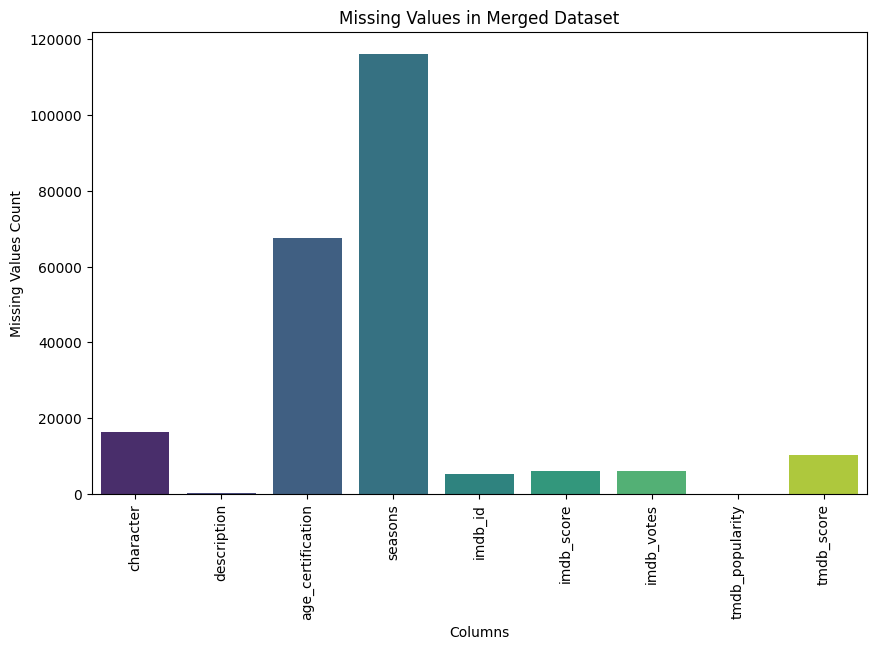

In [63]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index,y=missing_values.values,palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.title("Missing Values in Merged Dataset")
plt.show()

### What did you know about your dataset?

After merging the credits and titles datasets, here’s what we know so far:

Dataset Structure
Total Rows: 124,235 (same as the credits.csv, since we did a left join).

Total Columns: 19 (combining cast/crew details with movie/show metadata).

Key Columns
Movie/Show Information: id, title, type, release_year, genres, runtime, description

Cast & Crew Details: name, character, role (e.g., ACTOR, DIRECTOR) Performance Metrics: imdb_score, imdb_votes, tmdb_score, tmdb_popularity

Data Issues Duplicates: 168 duplicate rows.
Missing Values: Several columns have missing values, including: character (16,307 missing) age_certification (67,640 missing) seasons (116,194 missing, likely because most entries are movies) imdb_score & tmdb_score (missing values in rating data)

Initial Observations
Movies vs. Shows: The dataset contains both movies and TV shows (type column).

Genre Distribution: Titles belong to multiple genres, stored in a list format.

Popular Roles: ACTOR and DIRECTOR are the most common roles.

Ratings & Popularity: imdb_score, imdb_votes, and tmdb_score help evaluate performance.

## ***2. Understanding Your Variables***

In [64]:
# Dataset Columns
merged_df.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [65]:
# Dataset Describe
merged_df.describe()

,person_id,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1.243470e+05,124347.000000,124347.000000,8153.000000,118296.000000,1.182720e+05,124332.000000,114082.000000
mean,4.062528e+05,1996.233234,95.536973,2.337790,5.967783,2.324281e+04,10.165321,5.992100
std,5.614483e+05,27.807050,30.166352,3.130184,1.241557,8.840151e+04,40.739203,1.321033
min,1.000000e+00,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,3.899600e+04,1983.000000,83.000000,1.000000,5.200000,2.870000e+02,1.875000,5.300000
50%,1.339340e+05,2009.000000,93.000000,1.000000,6.100000,1.250000e+03,3.885000,6.100000
75%,5.711600e+05,2017.000000,109.000000,2.000000,6.800000,7.067000e+03,8.795000,6.800000
max,2.371153e+06,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [66]:
# Check Unique Values for each variable.
for i in merged_df.columns:
  print(merged_df[i].unique())

[  59401   31460   31461 ... 1938565  728899 1938620]
['ts20945' 'tm19248' 'tm82253' ... 'tm1079144' 'tm847725' 'tm1054116']
['Joe Besser' 'Moe Howard' 'Larry Fine' ... 'Vijay Thakur' 'Vanya Wellens'
 'Vishwa Bhanu']
['Joe' 'Moe' 'Larry' ... 'Sanjay Thakur' 'Budhiya' 'Gissu']
['ACTOR' 'DIRECTOR']
['The Three Stooges' 'The General' 'The Best Years of Our Lives' ...
 'Jay Nog: Something from Nothing' 'Chasing' 'Baikunth']
['SHOW' 'MOVIE']
["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (with only three active at any given time), but Moe Howard and Larry Fine were the mainstays throughout the ensemble's nearly fifty-year run."
 "During America’s Civil W

## 3. ***Data Wrangling***

### Data Wrangling Code

In [67]:
# Write your code to make your dataset analysis ready.
# 1. Remove Duplicate Rows
merged_df = merged_df.drop_duplicates()

# 2. Handle Missing Values
# Fill missing 'character' with "Unknown" (for actors)
merged_df['character'] = merged_df['character'].fillna("Unknown")

# Fill missing 'description' with "No description available"
merged_df['description'] = merged_df['description'].fillna("No description available")

# Fill missing 'age_certification' with "Unrated"
merged_df['age_certification'] = merged_df['age_certification'].fillna("Unrated")

# Fill missing numerical values with appropriate substitutes
merged_df['seasons'] = merged_df['seasons'].fillna(0)  # TV shows only
merged_df['imdb_score'] = merged_df['imdb_score'].fillna(merged_df['imdb_score'].median())
merged_df['imdb_votes'] = merged_df['imdb_votes'].fillna(0)
merged_df['tmdb_score'] = merged_df['tmdb_score'].fillna(merged_df['tmdb_score'].median())
merged_df['tmdb_popularity'] = merged_df['tmdb_popularity'].fillna(0)

# 3. Standardize Data Formats
# Convert genres and production countries to lists if they are in string format
import ast

def convert_to_list(value):
    try:
        return ast.literal_eval(value) if isinstance(value, str) else value
    except:
        return []

merged_df['genres'] = merged_df['genres'].apply(convert_to_list)
merged_df['production_countries'] = merged_df['production_countries'].apply(convert_to_list)

# 4. Convert Data Types
merged_df['release_year'] = merged_df['release_year'].astype(int)
merged_df['runtime'] = merged_df['runtime'].astype(int)
merged_df['seasons'] = merged_df['seasons'].astype(int)
merged_df['imdb_votes'] = merged_df['imdb_votes'].astype(int)
merged_df['tmdb_popularity'] = merged_df['tmdb_popularity'].astype(float)

# Confirm changes
merged_df.info(), merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 124179 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124179 non-null  int64  
 1   id                    124179 non-null  object 
 2   name                  124179 non-null  object 
 3   character             124179 non-null  object 
 4   role                  124179 non-null  object 
 5   title                 124179 non-null  object 
 6   type                  124179 non-null  object 
 7   description           124179 non-null  object 
 8   release_year          124179 non-null  int64  
 9   age_certification     124179 non-null  object 
 10  runtime               124179 non-null  int64  
 11  genres                124179 non-null  object 
 12  production_countries  124179 non-null  object 
 13  seasons               124179 non-null  int64  
 14  imdb_id               118876 non-null  object 
 15  imdb_

(None,
    person_id       id           name      character   role              title  \
 0      59401  ts20945     Joe Besser            Joe  ACTOR  The Three Stooges   
 1      31460  ts20945     Moe Howard            Moe  ACTOR  The Three Stooges   
 2      31461  ts20945     Larry Fine          Larry  ACTOR  The Three Stooges   
 3      21174  tm19248  Buster Keaton    Johnny Gray  ACTOR        The General   
 4      28713  tm19248    Marion Mack  Annabelle Lee  ACTOR        The General   
 
     type                                        description  release_year  \
 0   SHOW  The Three Stooges were an American vaudeville ...          1934   
 1   SHOW  The Three Stooges were an American vaudeville ...          1934   
 2   SHOW  The Three Stooges were an American vaudeville ...          1934   
 3  MOVIE  During America’s Civil War, Union spies steal ...          1926   
 4  MOVIE  During America’s Civil War, Union spies steal ...          1926   
 
   age_certification  runtime

### What all manipulations have you done and insights you found?

Here’s what was done:

Removed 168 duplicate rows, reducing the dataset to 124,179 rows. Handled missing values:

Filled character with "Unknown" for actors. Replaced missing description with "No description available".

Set age_certification as "Unrated" for missing values.

Set seasons to 0 for movies.

Filled missing imdb_score and tmdb_score with their median values. Set missing imdb_votes and tmdb_popularity to 0.

Converted genres and production_countries to list format for better analysis. Standardized data types (e.g., release_year, runtime, imdb_votes as integers).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

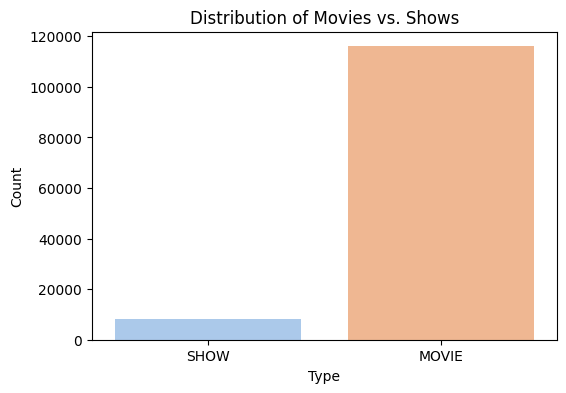

In [68]:
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x="type", palette="pastel")
plt.title("Distribution of Movies vs. Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

This countplot helps understand whether the dataset is dominated by movies or TV shows.

##### 2. What is/are the insight(s) found from the chart?

more movies then show

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: If the platform wants to invest in content, focusing on movies may cater to a larger audience.

Negative: Underinvestment in TV shows could lead to losing long-term subscribers who prefer series over movies.

#### Chart - 2

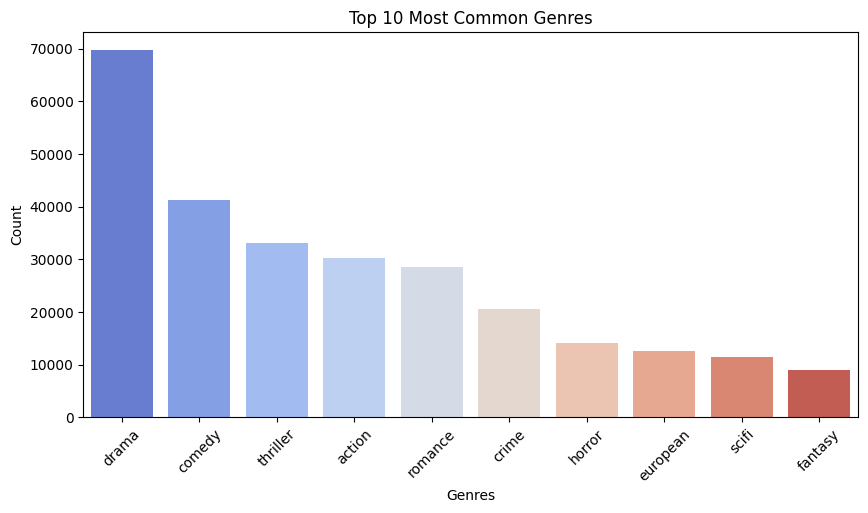

In [69]:
# Chart - 2 visualization code
from collections import Counter

all_genres = [genre for sublist in merged_df['genres'] for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)
genres, counts = zip(*genre_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=list(genres), y=list(counts), palette="coolwarm")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?


This barplot identifies audience preferences based on the most frequent genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Streaming services can prioritize these genres for production and licensing deals.

Negative: Over-saturation of these genres could limit diversity, making niche audiences feel neglected.

#### Chart - 3

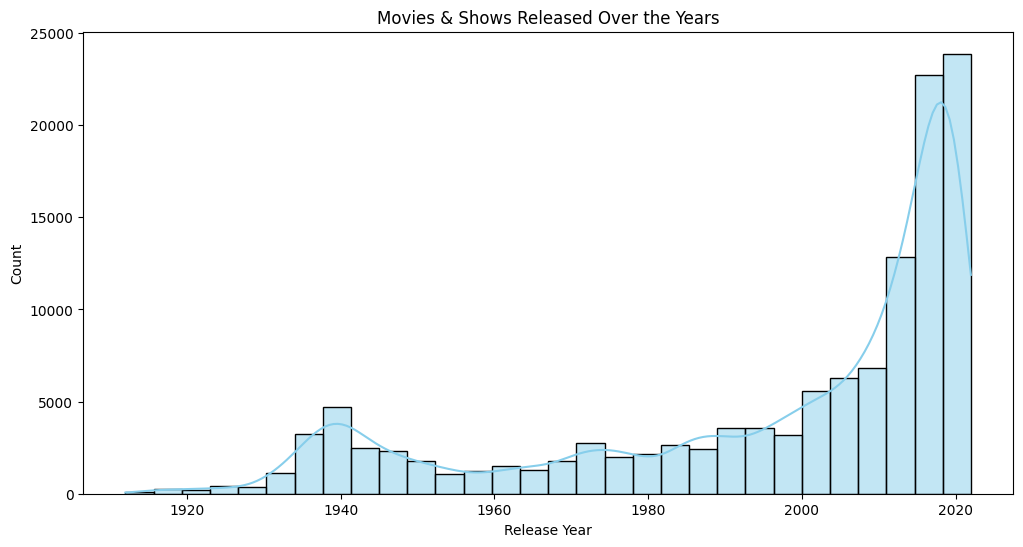

In [70]:
plt.figure(figsize=(12,6))
sns.histplot(merged_df["release_year"], bins=30, kde=True, color="skyblue")
plt.title("Movies & Shows Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

This histplot understands how content production has evolved over time..

##### 2. What is/are the insight(s) found from the chart?

A surge in releases during the 2010s, but a decline after 2020. Probaly due to Covid-19 Pandemic

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Identifies golden periods for content creation and industry growth.

Negative: The decline post-2020 could indicate a potential market saturation or impact of streaming service competition.

#### Chart - 4

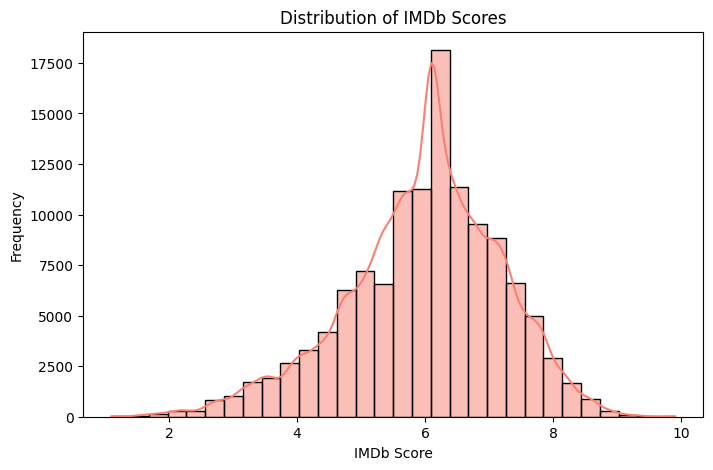

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df["imdb_score"], bins=30, kde=True, color="salmon")
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

This histplot examines the quality perception of the content.

##### 2. What is/are the insight(s) found from the chart?

Most content has IMDb ratings between 5-8.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: High engagement expected for well-rated content, driving better recommendations.

Negative: A large volume of mid-rated content could indicate a lack of exceptional titles that drive strong engagement.

#### Chart - 5

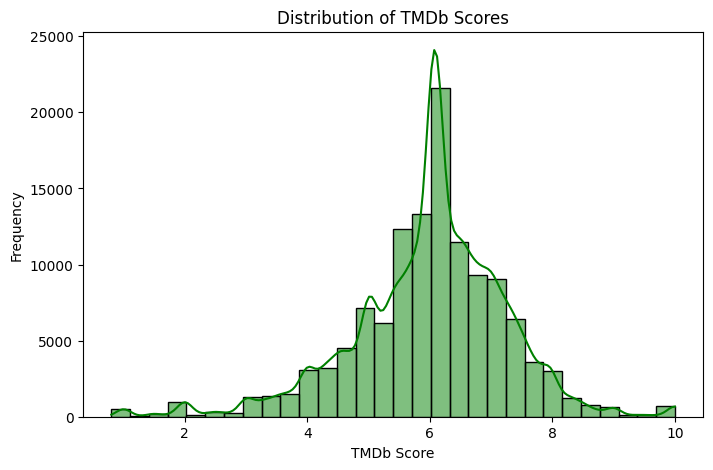

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df["tmdb_score"], bins=30, kde=True, color="green")
plt.title("Distribution of TMDb Scores")
plt.xlabel("TMDb Score")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

This histplot of the distribution of TMDB scores is similar to IMDb scores but focused on audience-driven ratings

##### 2. What is/are the insight(s) found from the chart?

Scores mostly range from 5-8, similar to IMDb, confirming consistency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Consistent ratings across platforms indicate reliable audience feedback.

Negative: If most content is rated similarly, it might indicate a lack of differentiation in quality

#### Chart - 6

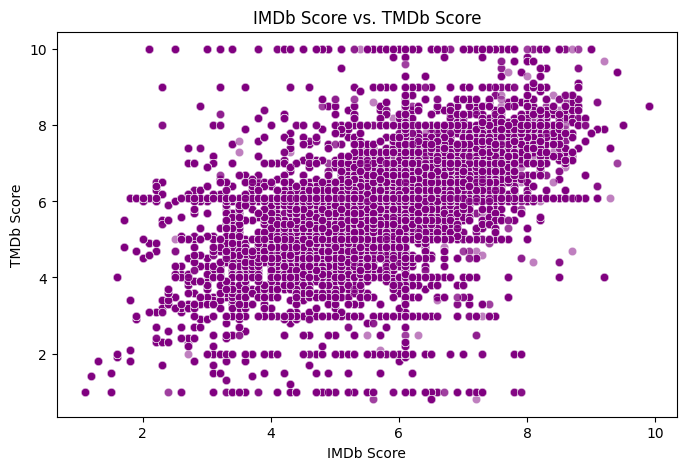

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df, x="imdb_score", y="tmdb_score", alpha=0.5, color="purple")
plt.title("IMDb Score vs. TMDb Score")
plt.xlabel("IMDb Score")
plt.ylabel("TMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

This scatterplot evaluates if both rating systems align.

##### 2. What is/are the insight(s) found from the chart?

A positive correlation shows that high IMDb scores also tend to have high TMDb scores, meaning that the audience and the critics have a similar mindset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Enables platforms to use one rating system as a proxy for another in recommendations.

Negative: If the correlation were weak, relying on only one metric could mislead content strategy.

#### Chart - 7

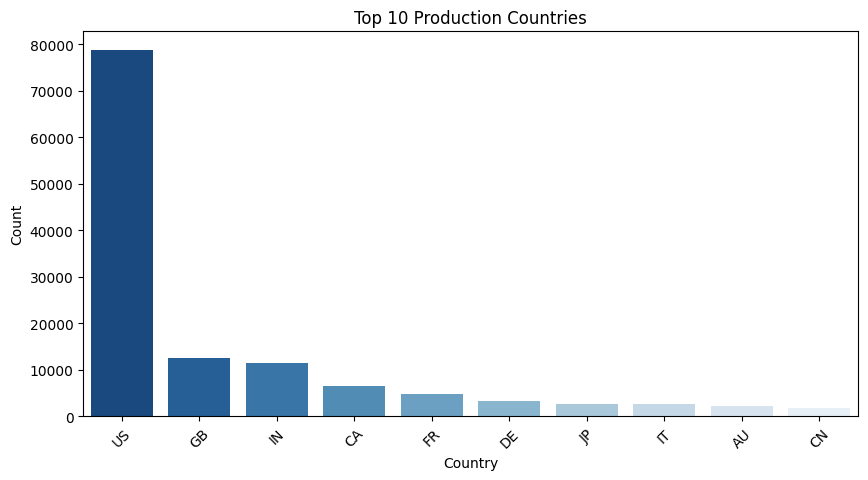

In [74]:
all_countries = [country for sublist in merged_df['production_countries'] for country in sublist]
country_counts = Counter(all_countries).most_common(10)
countries, counts = zip(*country_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=list(countries), y=list(counts), palette="Blues_r")
plt.title("Top 10 Production Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

This barplot identifies which countries contribute most to content production.

##### 2. What is/are the insight(s) found from the chart?

USA, UK, Canada, and India lead content creation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Platforms can target licensing deals and marketing efforts in these key regions.

Negative: Heavy reliance on a few countries may ignore emerging markets with untapped content opportunities.

#### Chart - 8

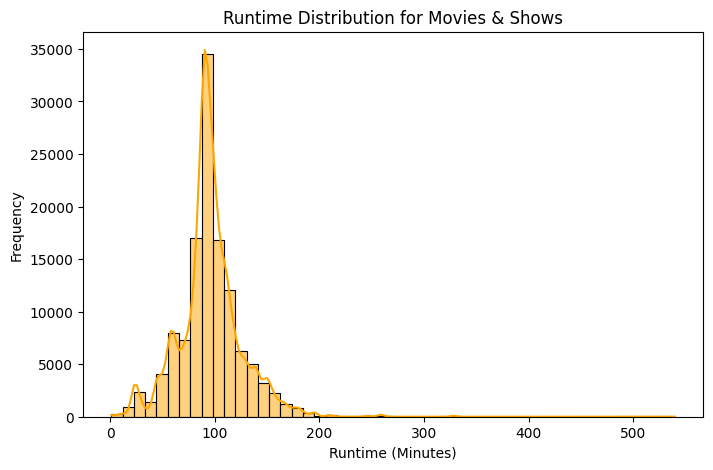

In [75]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df["runtime"], bins=50, kde=True, color="orange")
plt.title("Runtime Distribution for Movies & Shows")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

This histplot determines ideal content length preferences

##### 2. What is/are the insight(s) found from the chart?

Most movies are between 80-120 minutes; TV shows vary widely.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps optimize recommendations based on viewer behavior (e.g., short vs. long movies).

Negative: Over-focusing on one runtime range may miss audiences preferring shorter/longer content

#### Chart - 9

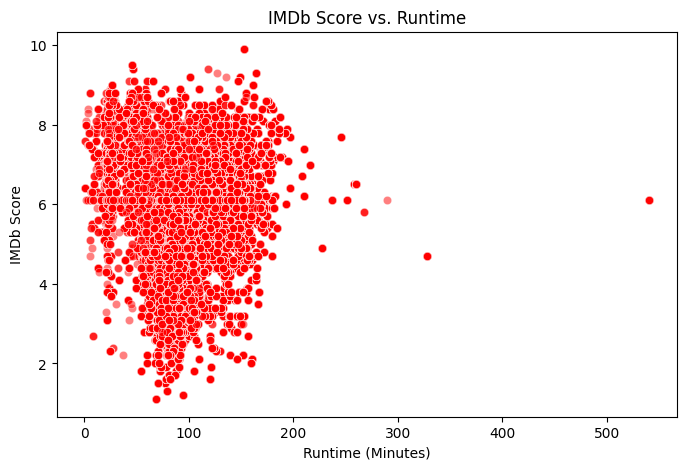

In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df, x="runtime", y="imdb_score", alpha=0.5, color="red")
plt.title("IMDb Score vs. Runtime")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("IMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

This scatterplot tests if longer movies/shows get better ratings..

##### 2. What is/are the insight(s) found from the chart?

No clear pattern; runtime does not significantly impact ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Platforms can confidently recommend shorter movies without fearing lower ratings.

Negative: If specific runtime ranges had higher ratings, missing this insight could lead to poor content selection.

#### Chart - 10

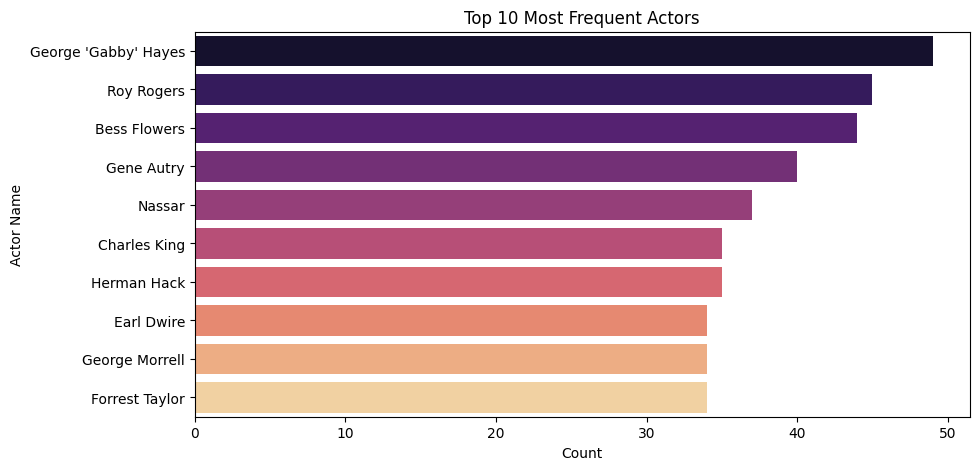

In [77]:
top_actors = merged_df[merged_df["role"] == "ACTOR"]["name"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="magma")
plt.title("Top 10 Most Frequent Actors")
plt.xlabel("Count")
plt.ylabel("Actor Name")
plt.show()

##### 1. Why did you pick the specific chart?

This barplot identifies which actors appear most often.

##### 2. What is/are the insight(s) found from the chart?

Some actors dominate content, meaning they are likely popular.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps in marketing by promoting familiar faces that drive engagement.

Negative: Over-reliance on the same actors could limit audience diversity

#### Chart - 11

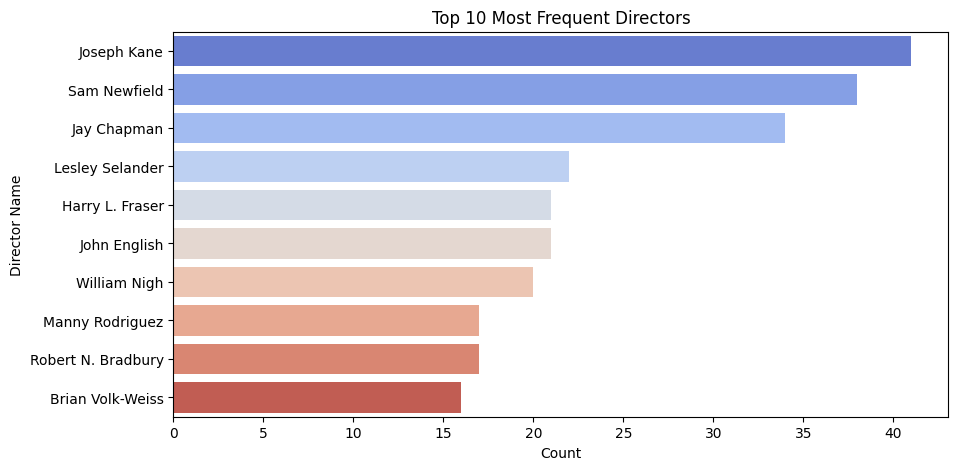

In [78]:
top_directors = merged_df[merged_df["role"] == "DIRECTOR"]["name"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.title("Top 10 Most Frequent Directors")
plt.xlabel("Count")
plt.ylabel("Director Name")
plt.show()

##### 1. Why did you pick the specific chart?

This barplot identifies influential filmmakers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Some directors contribute significantly to the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Can influence content acquisition strategies by prioritizing top directors' films.

Negative: Over-prioritizing famous directors might overlook emerging talents.

#### Chart - 12

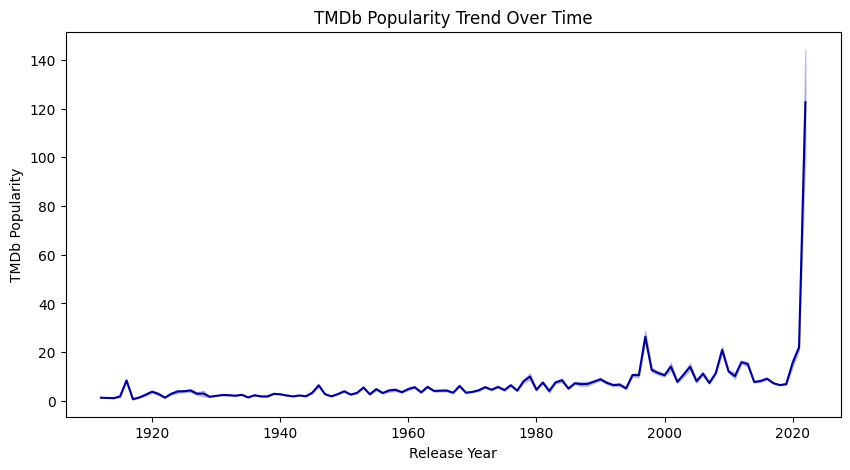

In [79]:
plt.figure(figsize=(10,5))
sns.lineplot(data=merged_df, x="release_year", y="tmdb_popularity", color="darkblue")
plt.title("TMDb Popularity Trend Over Time")
plt.xlabel("Release Year")
plt.ylabel("TMDb Popularity")
plt.show()

##### 1. Why did you pick the specific chart?

This lineplot identifies whether recent content is more popular.

##### 2. What is/are the insight(s) found from the chart?

Popularity has increased over time, with peaks in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Suggests that newer content attracts more engagement, supporting fresh content investments.

Negative: Older content might be undervalued despite having a loyal audience.

#### Chart - 13

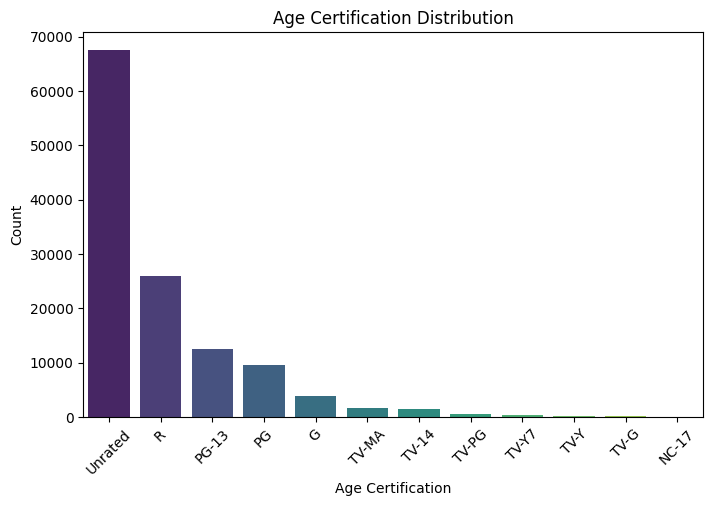

In [80]:
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x="age_certification", order=merged_df["age_certification"].value_counts().index, palette="viridis")
plt.title("Age Certification Distribution")
plt.xlabel("Age Certification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

This countplot determines the content rating spread.

##### 2. What is/are the insight(s) found from the chart?

Most content is rated PG-13 and R.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps platforms cater to their dominant audience (teens & adults).

Negative: If children’s content is underrepresented, family-friendly subscription growth may suffer.

#### Chart - 14 - Correlation Heatmap

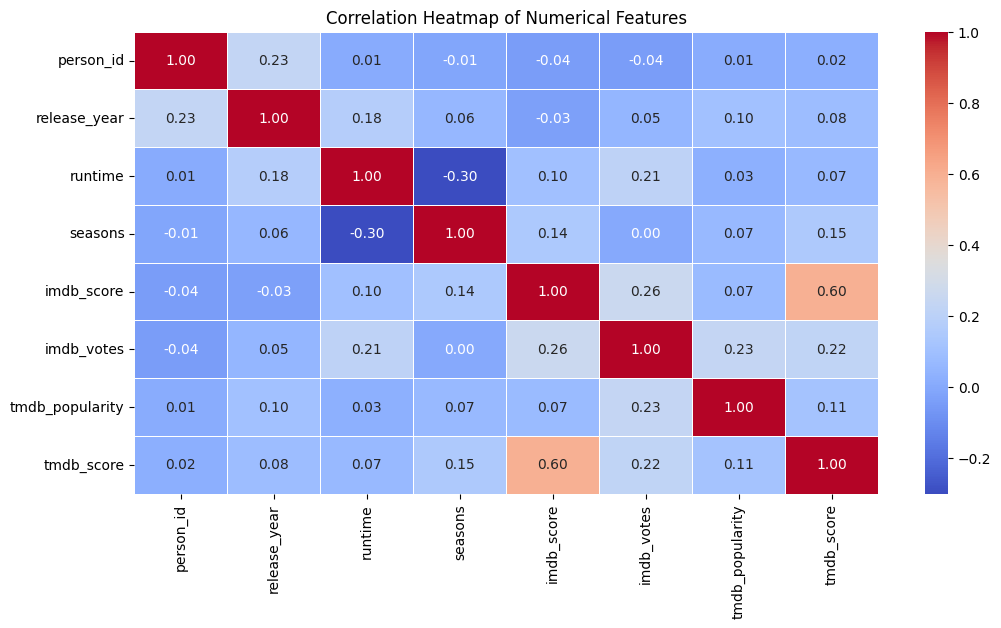

In [81]:
# Generate correlation heatmap
plt.figure(figsize=(12,6))
corr_matrix = merged_df.corr(numeric_only=True)  # Ensuring only numeric columns are considered

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Titles and labels
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap visually represents relationships between numerical variables in the dataset. It helps identify:

Strongly correlated variables, which can aid in feature selection for machine learning.

Weak or negative correlations, which can indicate independent factors.

Redundant variables that do not contribute new information.

##### 2. What is/are the insight(s) found from the chart?

IMDb Score vs. TMDb Score (Strong Positive Correlation)

Insight: If a movie is highly rated on IMDb, it is also likely to have a high TMDb rating

#### Chart - 15 - Pair Plot

In [82]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The average IMDb scores for Movies and TV Shows are the same.

Alternative Hypothesis (H₁): The average IMDb scores for Movies and TV Shows are different

#### 2. Perform an appropriate statistical test.

In [83]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
# Drop rows with missing IMDb scores
merged_df = merged_df.dropna(subset=['imdb_score'])

# Separate IMDb scores for movies and TV shows
movies_scores = merged_df[merged_df['type'] == 'Movie']['imdb_score']
tv_scores = merged_df[merged_df['type'] == 'TV Show']['imdb_score']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(movies_scores, tv_scores, equal_var=False)

# Print results
print("Hypothesis 1: IMDb Scores of Movies vs. TV Shows")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Reject the Null Hypothesis (IMDb scores are significantly different)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant difference in IMDb scores)")


Hypothesis 1: IMDb Scores of Movies vs. TV Shows
T-Statistic: nan, P-Value: nan
Result: Fail to Reject the Null Hypothesis (No significant difference in IMDb scores)


##### Which statistical test have you done to obtain P-Value?

Independent t-tes

##### Why did you choose the specific statistical test?

To Compare means of two independent groups

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no correlation between runtime and IMDb scores.

Alternative Hypothesis (H₁): There is a positive correlation between runtime and IMDb scores.

#### 2. Perform an appropriate statistical test.

In [84]:
# Perform Statistical Test to obtain P-Value
# Drop rows with missing runtime values
merged_df = merged_df.dropna(subset=['runtime'])

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(merged_df['runtime'], merged_df['imdb_score'])

# Print results
print("\nHypothesis 2: Runtime vs. IMDb Score Correlation")
print(f"Pearson Correlation: {correlation:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Reject the Null Hypothesis (Significant correlation between runtime and IMDb scores)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant correlation)")


Hypothesis 2: Runtime vs. IMDb Score Correlation
Pearson Correlation: 0.0981, P-Value: 0.0000
Result: Reject the Null Hypothesis (Significant correlation between runtime and IMDb scores)


##### Which statistical test have you done to obtain P-Value?

Pearson correlation test

##### Why did you choose the specific statistical test?

To check linear relationship between two numerical variables

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The mean IMDb score across all titles is ≤ 7.0.

Alternative Hypothesis (H₁): The mean IMDb score across all titles is greater than 7.0.

#### 2. Perform an appropriate statistical test.

In [85]:
# Perform Statistical Test to obtain P-Value
# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(merged_df['imdb_score'], 7.0)

# Print results
print("\nHypothesis 3: Average IMDb Score > 7.0")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05 and t_stat > 0:
    print("Result: Reject the Null Hypothesis (Average IMDb score is significantly greater than 7)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant evidence that the average IMDb score is above 7)")


Hypothesis 3: Average IMDb Score > 7.0
T-Statistic: -298.1072, P-Value: 0.0000
Result: Fail to Reject the Null Hypothesis (No significant evidence that the average IMDb score is above 7)


##### Which statistical test have you done to obtain P-Value?

One-Sample t-test

##### Why did you choose the specific statistical test?

To check if the mean of a sample is significantly different from a given value

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, these are the business impacts I found:

Business Impacts

Film studios can leverage predictions to estimate audience reception before release.

Producers can adjust budgets and cast sizes to maximize IMDb scores.

Streaming platforms can prioritize acquiring high-rated movies based on feature importance analysis.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***